In [4]:
import pandas as pd
import numpy as np

import sys
sys.path.append("..")

import consts
pd.options.display.max_rows = 50

pd.options.display.max_columns = 100
import combine_data

In [58]:
inputevets_filtered = pd.read_csv("filtered\\input_events_filtered_by_subject_id_and_medicine.csv")
chartevents_filtered = pd.read_csv("filtered\\filtered_chartevents.csv")
icustays_filtered = pd.read_csv("filtered\\filtered_icustays.csv")
patients_filtered = pd.read_csv("filtered\\filtered_patients.csv")
procedureevents_filtered = pd.read_csv("filtered\\filtered_procedureevents.csv")
labevents_filtered = pd.read_csv("filtered\\filtered_labevents.csv")
transfers_filtered = pd.read_csv("filtered\\filtered_transfers.csv")
itemid = pd.read_csv("data\\icu\\d_items.csv")

In [ ]:
combine_data.create_combined_df(inputevets_filtered,
icustays_filtered,
chartevents_filtered,
labevents_filtered, 
procedureevents_filtered)

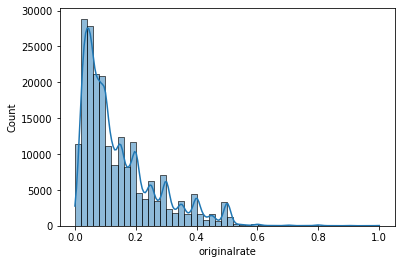

In [103]:
tmp = inputevets_filtered[(inputevets_filtered["itemid_label"]== "Norepinephrine") & (inputevets_filtered["rateuom"] == "mcg/kg/min") & (inputevets_filtered["rate"] < 1)].sort_values(by=["stay_id","starttime"])[["stay_id","starttime", "endtime", "amount","rate", "originalrate", "statusdescription"]]["originalrate"]
import seaborn as sns
sns.histplot(tmp, bins=50, kde=True)
plt.savefig("plots/original rate histogram.png")